In [1]:
from PIL import Image
import os

import sys

sys.path.append('../')
from cupagp.classifier import BinaryClassifier
import numpy as np

Load dataset and label set from file.

In [2]:
IH = 128
IW = 128

data = np.array([])
label = np.array([])

# load 'cork' as label '1'
for root, ds, fs in os.walk('../datasets/kth/cork_all/'):
    for f in fs:
        # read image and convert it to ndarray type
        image = Image.open('../datasets/kth/cork_all/' + f).convert('L')
        image = image.resize((IH, IW))
        image_arr = np.array(image).astype(float)
        # add to data and label
        data = np.append(data, image_arr)
        label = np.append(label, [1])

# load 'brown bread' as label '0'
for root, ds, fs in os.walk('../datasets/kth/brown_bread_all/'):
    for f in fs:
        # read image and convert it to ndarray type
        image = Image.open('../datasets/kth/brown_bread_all/' + f).convert('L')
        image = image.resize((IH, IW))
        image_arr = np.array(image).astype(float)
        # add to data and label
        data = np.append(data, image_arr)
        label = np.append(label, [0])

data = data.reshape(-1, IH, IW)
print(f'data shape: {data.shape}; label shape: {label.shape}')

data shape: (864, 128, 128); label shape: (864,)


Shuffle dataset and label.

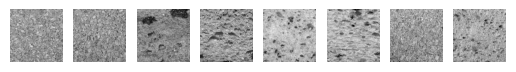

[1. 1. 0. 0. 0. 0. 1. 0.]


In [3]:
# shuffle
data_label = list(zip(data, label))
np.random.shuffle(data_label)
data, label = zip(*data_label)
data, label = np.array(data), np.array(label)

# show 8 figures
from matplotlib import pyplot as plt

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(data[i], cmap='gray')
    plt.axis('off')
plt.show()

# their correspond labels
print(label[:8])

Split train set and test set.

In [4]:
size = len(data)
train_size = size // 4 * 3
train_data, train_label, test_data, test_label = data[:train_size], label[:train_size], \
                                                 data[train_size:], label[train_size:]

size = len(test_data) // 2
valid_data, valid_label = test_data[:size], test_label[:size]
test_data, test_label = test_data[size:], test_label[size:]
print(f'train data shape: {train_data.shape}; valid data shape: {valid_data.shape}; test data shape: {test_data.shape}')

train data shape: (648, 128, 128); valid data shape: (108, 128, 128); test data shape: (108, 128, 128)


Create a binary classifier and send train_data, train_label, test_data, test_label to it.
This cell uses 'py_cuda' as cuda backend.
The arg 'eval_batch' is set to 20 to avoid memory allocate failed on the GPU.

In [5]:
device = 'py_cuda'
eval_batch = 20

# if the two following args are set to None, the nvcc will automatically select one for compiling
# this might have mistakes, so you can specify these two args
# such as: cuda_arch = 'compute_75'; cuda_code = 'sm_75'
cuda_arch = None
cuda_code = None


classifier = BinaryClassifier(train_data, train_label, valid_data, valid_label, test_data, test_label,
                              eval_batch=eval_batch, device=device)

# train
classifier.train()

# test
classifier.run_test()

# remove the reference, to make sure the device side memory space is cleared
del classifier

C:\Users\Derek\Desktop\cupagp\cupagp\eval_pycuda.py:695: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu

  self._infer_population_kernel = SourceModule(source=_CUDA_CPP_SOURCE_CODE, arch=cuda_arch, code=cuda_code) \


[ Generation   ]  0
[ Best Fitness ]  0.8070987654320988
[ Best Program ]  [ Sub G_Std LoG2 Region_R(88, 28, 36, 53) G_Std Hist_Eq Region_S(28, 12, 36, 36) ]

[ Generation   ]  1
[ Best Fitness ]  0.8302469135802469
[ Best Program ]  [ Sub G_Std Region_R(14, 81, 87, 32) Sub Sub Sub G_Std Region_S(0, 29, 47, 47) G_Std Region_R(43, 107, 54, 21) G_Std Region_S(103, 71, 21, 21) G_Std Lap Region_R(88, 33, 35, 37) ]

[ Generation   ]  2
[ Best Fitness ]  0.8719135802469136
[ Best Program ]  [ Sub G_Std Region_R(14, 81, 87, 32) Sub G_Std Region_S(2, 13, 110, 110) G_Std Lap Region_R(88, 33, 35, 37) ]

[ Generation   ]  3
[ Best Fitness ]  0.8858024691358025
[ Best Program ]  [ Sub G_Std Region_S(2, 13, 110, 110) Sub G_Std Region_S(2, 13, 110, 110) G_Std Lap Region_R(88, 33, 35, 37) ]

[ Generation   ]  4
[ Best Fitness ]  0.8858024691358025
[ Best Program ]  [ Sub G_Std Region_S(2, 13, 110, 110) Sub G_Std Region_S(2, 13, 110, 110) G_Std Lap Region_R(88, 33, 35, 37) ]

[ Generation   ]  5
[ Bes